
# Project: Investigate No-show appointments Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 
>
>* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
>
>* ‘Neighborhood’ indicates the location of the hospital.
>
>* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>
>### Questions List:
>* Q1: Does the Neighbourhood have strong affect on the attendence?
>
>* Q2: What are the reasons that make most of people did not attend?

In [72]:
# Importing some package that we needed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
####  Loading our data and show some lines of it

In [73]:
df=pd.read_csv('C:/Users/admin/Desktop/noshowappointments.CSV')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Display the number of raw (patient) and their charachteristics (columns).

In [74]:
df.shape

(110527, 14)

#### Display the type of the DataFrame for each column and number of non-values(NaN).

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Display descriptive statistics for each columns of data

In [76]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>* Minimum age = -1 , And that is doesn't make any sense.

### Data Cleaning 
#### Drop some columns that we do not need

In [77]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'],axis= 1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Rename 'Hipertension' to the correct spelling 'Hypertension'.
#### Rename 'No-show' to 'Noshow'.

In [78]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'Noshow'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Replace the wrong value in the Age column with 0 to make sense

In [79]:
df['Age']= df['Age'].replace([-1],0)
df['Age'].min() # Now we can see that the min value is 0 not -1 .

0

#### make sure that there is no NaN values

In [80]:
df.isnull().sum().sum()

0

>* There is no NaN values in the data.

<a id='eda'></a>
## Exploratory Data Analysis

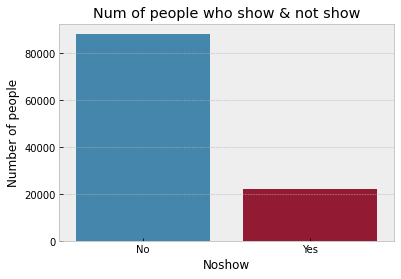

In [81]:
#Plot hist of No_show column

plt.style.use('bmh')
ax=sns.countplot(x=df.Noshow,data=df)
plt.ylabel('Number of people')
plt.title('Num of people who show & not show')
plt.show()

>* Number of people who did not show is greater than who did show by 4 times.

# Data Visualizing and analysing .

### Functions to avoid reptitive code.

In [82]:
# Function for ploting histogram relationship between 2 columns.

def plothist(column1,column2,x_labels,xname,):
    plt.style.use('bmh')
    ax=sns.countplot(x=column1,hue=column2,data=df)
    ax.set_xticklabels(x_labels)
    plt.xlabel(xname)
    plt.ylabel('Number of patient')
    plt.title('Num of who Show&Notshow according to the '+ xname)
    plt.show()
    
# Function to translate the Histogram into numbers.

def transplot(column):
    return df.groupby(column).Noshow.value_counts()

### Research Question 1 : Does the Neighbourhood have strong affect on the attendence

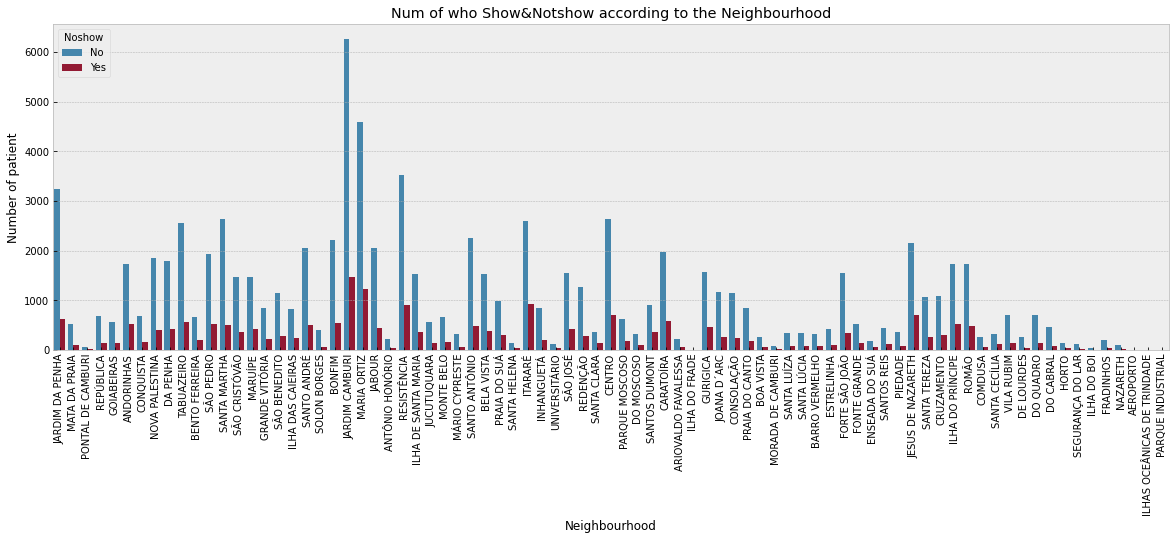

In [83]:
# Compare those who showed to those who didn't show according to the Neighbourhood.

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
ax=sns.countplot(x=df.Neighbourhood,hue=df.Noshow)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patient')
plt.title('Num of who Show&Notshow according to the Neighbourhood')
plt.show()

In [84]:
# Translate the histo into numbers trying to figure relationship between data.

transplot('Neighbourhood')

Neighbourhood    Noshow
AEROPORTO        No           7
                 Yes          1
ANDORINHAS       No        1741
                 Yes        521
ANTÔNIO HONÓRIO  No         221
                           ... 
TABUAZEIRO       Yes        573
UNIVERSITÁRIO    No         120
                 Yes         32
VILA RUBIM       No         710
                 Yes        141
Name: Noshow, Length: 160, dtype: int64

> * The Neighbourhood strongly affect on the showing of The patients but we could not detect spacific reason.

### Research Question 2 : What are the factors that make most of people did not attend?

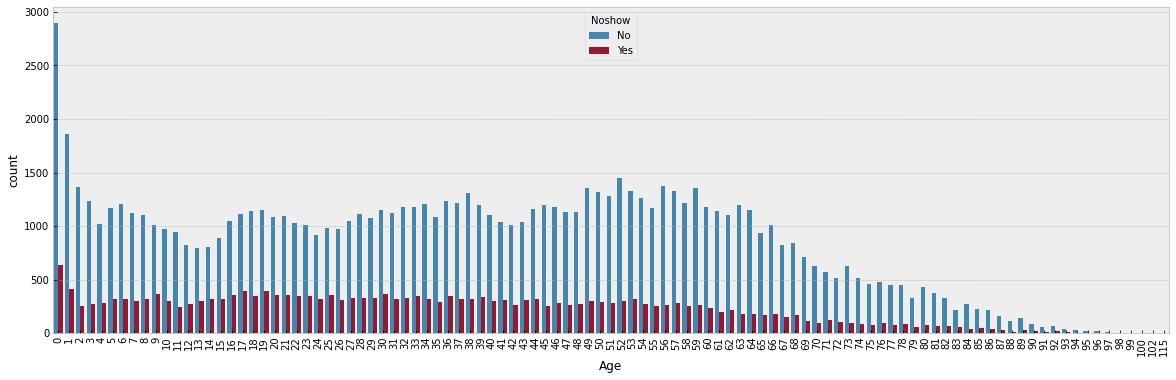

In [85]:
# Compare those who showed to those who didn't show according to the Age.

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
ax=sns.countplot(x=df.Age,hue=df.Noshow)
plt.show()

In [86]:
# Translate the histo into numbers trying to figure relationship between data.

transplot('Age')

Age  Noshow
0    No        2901
     Yes        639
1    No        1858
     Yes        415
2    No        1366
               ... 
99   No           1
100  No           4
102  No           2
115  Yes          3
     No           2
Name: Noshow, Length: 203, dtype: int64

> * The more patient get older, The less they attend regardless to thier original number of each category.
>
> * Age Category from 10 to 30 have hight percentage of attendece accoring to thier numbers(show + not show).
>
> * Age Category from 55 to 70 have lower percentage of attendece accoring to thier numbers(show + not show).
>
> * we had deduced some result to enhance to focus more in older people category to increace the percentage of attendence.

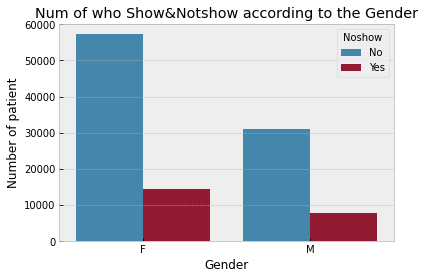

In [87]:
# Compare those who showed to those who didn't show according to thier gender.

plothist(df.Gender,df.Noshow,['F','M'],'Gender')

> * Gender data is insignificant.
>
> * Number of Female who did not show is more than number of Male who did not show.
> 
> * Number of Female who did show is more than number of Male who did show.

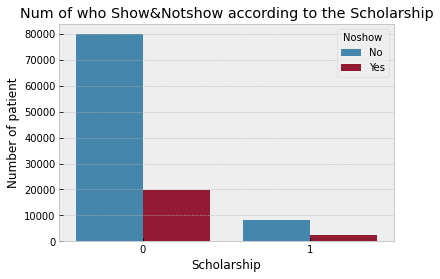

In [88]:
# Compare those who showed to those who didn't show according to enrolling to the Scholarship.

plothist(df.Scholarship,df.Noshow,['0','1'],'Scholarship')

In [89]:
# Translate the histo into numbers trying to figure relationship between data.

transplot('Scholarship')

Scholarship  Noshow
0            No        79925
             Yes       19741
1            No         8283
             Yes        2578
Name: Noshow, dtype: int64

> * Scholarship data is insignificant.
>
> * Number of patient who did not enroll is more than who did enroll.
> 
> * There is no relation between the attendance and enrolling in the Scholarship.

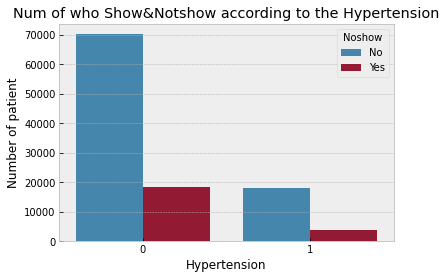

In [90]:
# Compare those who showed to those who didn't show according to who did have Hypertension and who did not.

plothist(df.Hypertension,df.Noshow,['0','1'],'Hypertension')

In [91]:
# Translate the histo into numbers trying to figure relationship between data.

transplot('Hypertension')

Hypertension  Noshow
0             No        70179
              Yes       18547
1             No        18029
              Yes        3772
Name: Noshow, dtype: int64

> * Hypertension data is insignificant.
>
> * The percentage of people who haven't hypertension and show is greater than who have and not show everything
> according to his case(have and haven't).
> * But we cann't deduce any result because the difference of the two percentage is just so small.

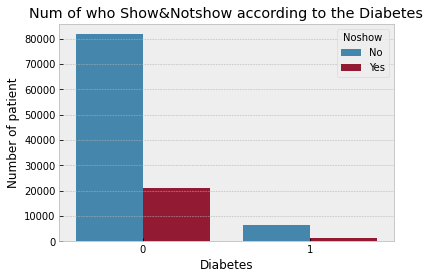

In [92]:
# Compare those who showed to those who didn't show according to who did have Diabetes and who did not.

plothist(df.Diabetes,df.Noshow,['0','1'],'Diabetes')

In [93]:
# Translate the histo into numbers trying to figure relationship between data.

transplot('Diabetes')

Diabetes  Noshow
0         No        81695
          Yes       20889
1         No         6513
          Yes        1430
Name: Noshow, dtype: int64

> * Diabetes data is insignificant.
>
> * The percentage of people who haven't Diabetes and show is almost equal to who have and not show everthing
> according to his case(have and haven't).
> * But we cann't deduce any result because the percentage is almost equal.

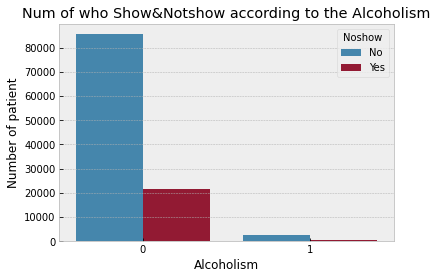

In [94]:
# Compare those who showed to those who didn't show according to who did have Alcoholism and who did not.

plothist(df.Alcoholism,df.Noshow,['0','1'],'Alcoholism')

In [95]:
# Translate the histo into numbers trying to figure relationship between data.

transplot('Alcoholism')

Alcoholism  Noshow
0           No        85525
            Yes       21642
1           No         2683
            Yes         677
Name: Noshow, dtype: int64

> * Alcoholism data is insignificant.
>
> * The percentage of people who haven't Alcoholism and show is almost equal to who have and not show everthing
> according to his case(have and haven't).
> * But we cann't deduce any result because the percentage is almost equal.

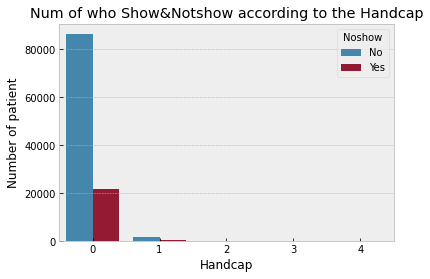

In [96]:
# Compare those who showed to those who didn't show according to who did have Handcap and who did not.

plothist(df.Handcap,df.Noshow,['0','1','2','3','4'],'Handcap')

In [97]:
# Translate the histo into numbers trying to figure relationship between data.

transplot('Handcap')

Handcap  Noshow
0        No        86374
         Yes       21912
1        No         1676
         Yes         366
2        No          146
         Yes          37
3        No           10
         Yes           3
4        No            2
         Yes           1
Name: Noshow, dtype: int64

> * Handcap data is insignificant.

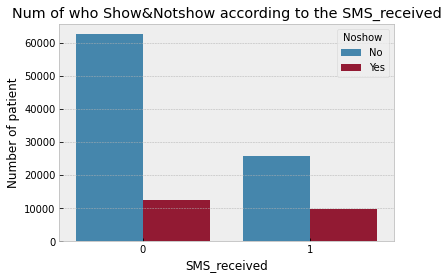

In [98]:
# Compare those who showed to those who didn't show according to who did have received SMS and who did not.

plothist(df.SMS_received,df.Noshow,['0','1'],'SMS_received')

In [99]:
# Translate the histo into numbers trying to figure relationship between data.

transplot('SMS_received')

SMS_received  Noshow
0             No        62510
              Yes       12535
1             No        25698
              Yes        9784
Name: Noshow, dtype: int64

> * SMS_received data is useful in smallpoint.
>
> * The percentage of people who have received SMS and show is greater than who haven't and not show everthing
> according to his case(received and not received).
> * we deduced that the more patient received SMS the more patient will come because the difference between the two percentage is not small(almost 10% increase in attendence when send SMS).
>
>* We will notice also that people who came without sending messages is more than who came after sending messages that is because we did not send messsages to too many people

<a id='conclusions'></a>
## Conclusions

>* We had deduced that if we send SMS to all patient we will increace the percentage of the attendence.
>
>* We have different percentage of attendence from age category to another category is difference we must foucs more in category that have much lower percentage in attendence to make them attend.
>
>* The Neighbourhood strongly affected the percentage of show, But we cann't ensure that is because of distance or because of the efficiency of the hospital or other factors that we do not know from this data.
>
>* We couldn't detect direct corrolation between the showing of patients or no-showing according to to many characteristics like [Gender, Scholarship, Hypertension, Diabetes, Alcoholism and Handcap].
>
#### Limitation
>* There are limited data about the Neighbourhood(hospital places), Although it is have strongly affect on the show and no show.
>
>* We have like 9 samples or more, But it isn't enough to deduced efficient result.
>
>* I think that missing values might influence the results of the analysis.
>
>* We need statistical test on others samples to dedect direct corrolation.

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate_a_Dataset.ipynb'])

4294967295